<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/ReviewsRatingsEdition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Packages ## 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import pandas.plotting as pdplt

##Read Data##

In [16]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [17]:
print("Shape of train data",train_data.shape,"Problematic records in training data: ",train_data.isnull().sum().sum())
print("Shape of test data",test_data.shape,"Problematic records in test data: ",test_data.isnull().sum().sum())

Shape of train data (6237, 9) Problematic records in training data:  0
Shape of test data (1560, 8) Problematic records in test data:  0


##Train Data Preprocessing##

Peek of the data

In [18]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Statistical summary

In [19]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

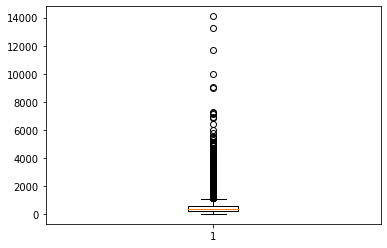

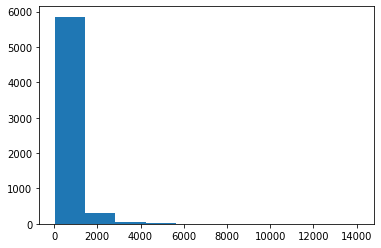

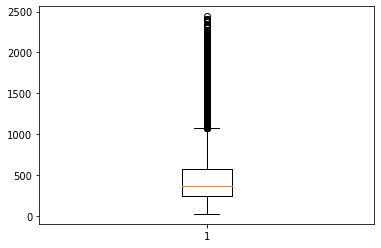

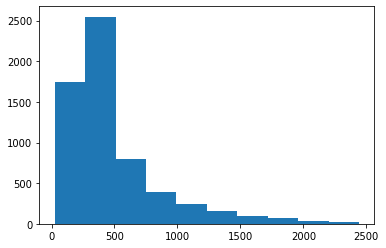

In [20]:
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()

In [21]:
train_data.describe()

,Price
count,6105.000000
mean,487.640822
std,384.816876
min,25.000000
25%,248.000000
50%,369.000000
75%,579.000000
max,2442.000000


Reviews Normalization

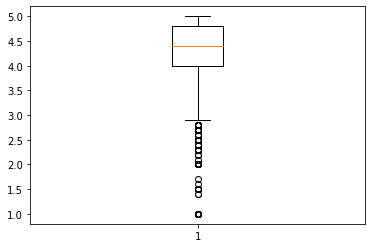

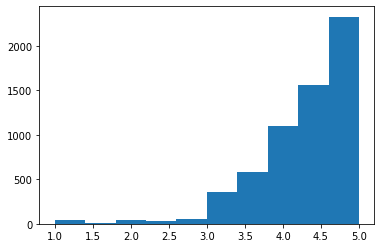

In [22]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()

Ratings Normalization

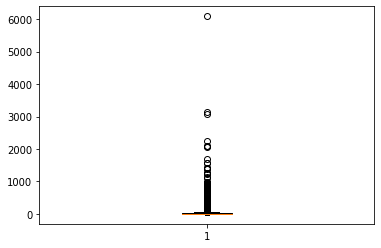

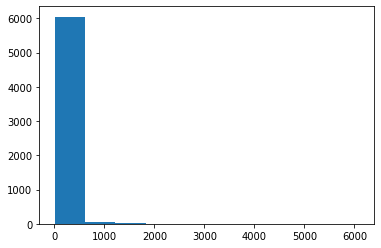

In [23]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()

Drop Title & Author & Synopsis & Genre columns

In [24]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [25]:
train_data['Edition'] = train_data['Edition'].apply(lambda x: x.split(',')[0])

In [26]:
train_data.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,Paperback,4.0,8.0,Action & Adventure,220.00
1,Paperback,3.9,14.0,"Biographies, Diaries & True Accounts",202.93
2,Paperback,4.8,6.0,Humour,299.00
3,Paperback,4.1,13.0,"Crime, Thriller & Mystery",180.00
4,Hardcover,5.0,1.0,"Arts, Film & Photography",965.62


Book Category Normalization / Extract Categories

In [27]:
train_data.pop('BookCategory')

0                         Action & Adventure
1       Biographies, Diaries & True Accounts
2                                     Humour
3                  Crime, Thriller & Mystery
4                   Arts, Film & Photography
                        ...                 
6232                                  Humour
6233               Crime, Thriller & Mystery
6234                                 Romance
6235                      Action & Adventure
6236                      Action & Adventure
Name: BookCategory, Length: 6105, dtype: object

Finish training inputs(z)

In [28]:
z = train_data

In [29]:
train_data.head()

,Edition,Reviews,Ratings,Price
0,Paperback,4.0,8.0,220.00
1,Paperback,3.9,14.0,202.93
2,Paperback,4.8,6.0,299.00
3,Paperback,4.1,13.0,180.00
4,Hardcover,5.0,1.0,965.62


##Test Data Preprocessing##

Reviews Normalization

In [30]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule  

Ratings Normalization

In [31]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 

Drop Title & Synopsis columns

In [32]:
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Author')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [33]:
test_data['Edition'] = test_data['Edition'].apply(lambda x: x.split(',')[0])

In [34]:
test_data.head()

,Edition,Reviews,Ratings,BookCategory
0,Mass Market Paperback,4.4,960.0,"Crime, Thriller & Mystery"
1,Paperback,5.0,1.0,"Computing, Internet & Digital Media"
2,Paperback,5.0,4.0,Romance
3,Paperback,4.1,11.0,"Computing, Internet & Digital Media"
4,Paperback,4.4,9.0,"Language, Linguistics & Writing"


Book Category Normalization / Extract Categories

In [35]:
test_data.pop('BookCategory')

0                  Crime, Thriller & Mystery
1        Computing, Internet & Digital Media
2                                    Romance
3        Computing, Internet & Digital Media
4            Language, Linguistics & Writing
                        ...                 
1555     Computing, Internet & Digital Media
1556    Biographies, Diaries & True Accounts
1557                                  Humour
1558    Biographies, Diaries & True Accounts
1559         Language, Linguistics & Writing
Name: BookCategory, Length: 1560, dtype: object

Finish Test set Inputs

In [36]:
z_test = test_data
z_test.head()

,Edition,Reviews,Ratings
0,Mass Market Paperback,4.4,960.0
1,Paperback,5.0,1.0
2,Paperback,5.0,4.0
3,Paperback,4.1,11.0
4,Paperback,4.4,9.0


## Combine Train and Test datasets to extract categorical features ##

In [37]:
train = train_data.copy()
test = test_data.copy()
concat = pd.concat(objs=[train,test],axis=0)
y = train.pop('Price')

In [38]:
concat.head()

,Edition,Reviews,Ratings,Price
0,Paperback,4.0,8.0,220.00
1,Paperback,3.9,14.0,202.93
2,Paperback,4.8,6.0,299.00
3,Paperback,4.1,13.0,180.00
4,Hardcover,5.0,1.0,965.62


In [39]:
concat= pd.get_dummies(concat, columns= ['Edition'],drop_first=True)

In [40]:
concat.head()

,Reviews,Ratings,Price,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,202.93,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [41]:
train_size = len(train)
train = concat[:train_size]
test = concat[train_size:]

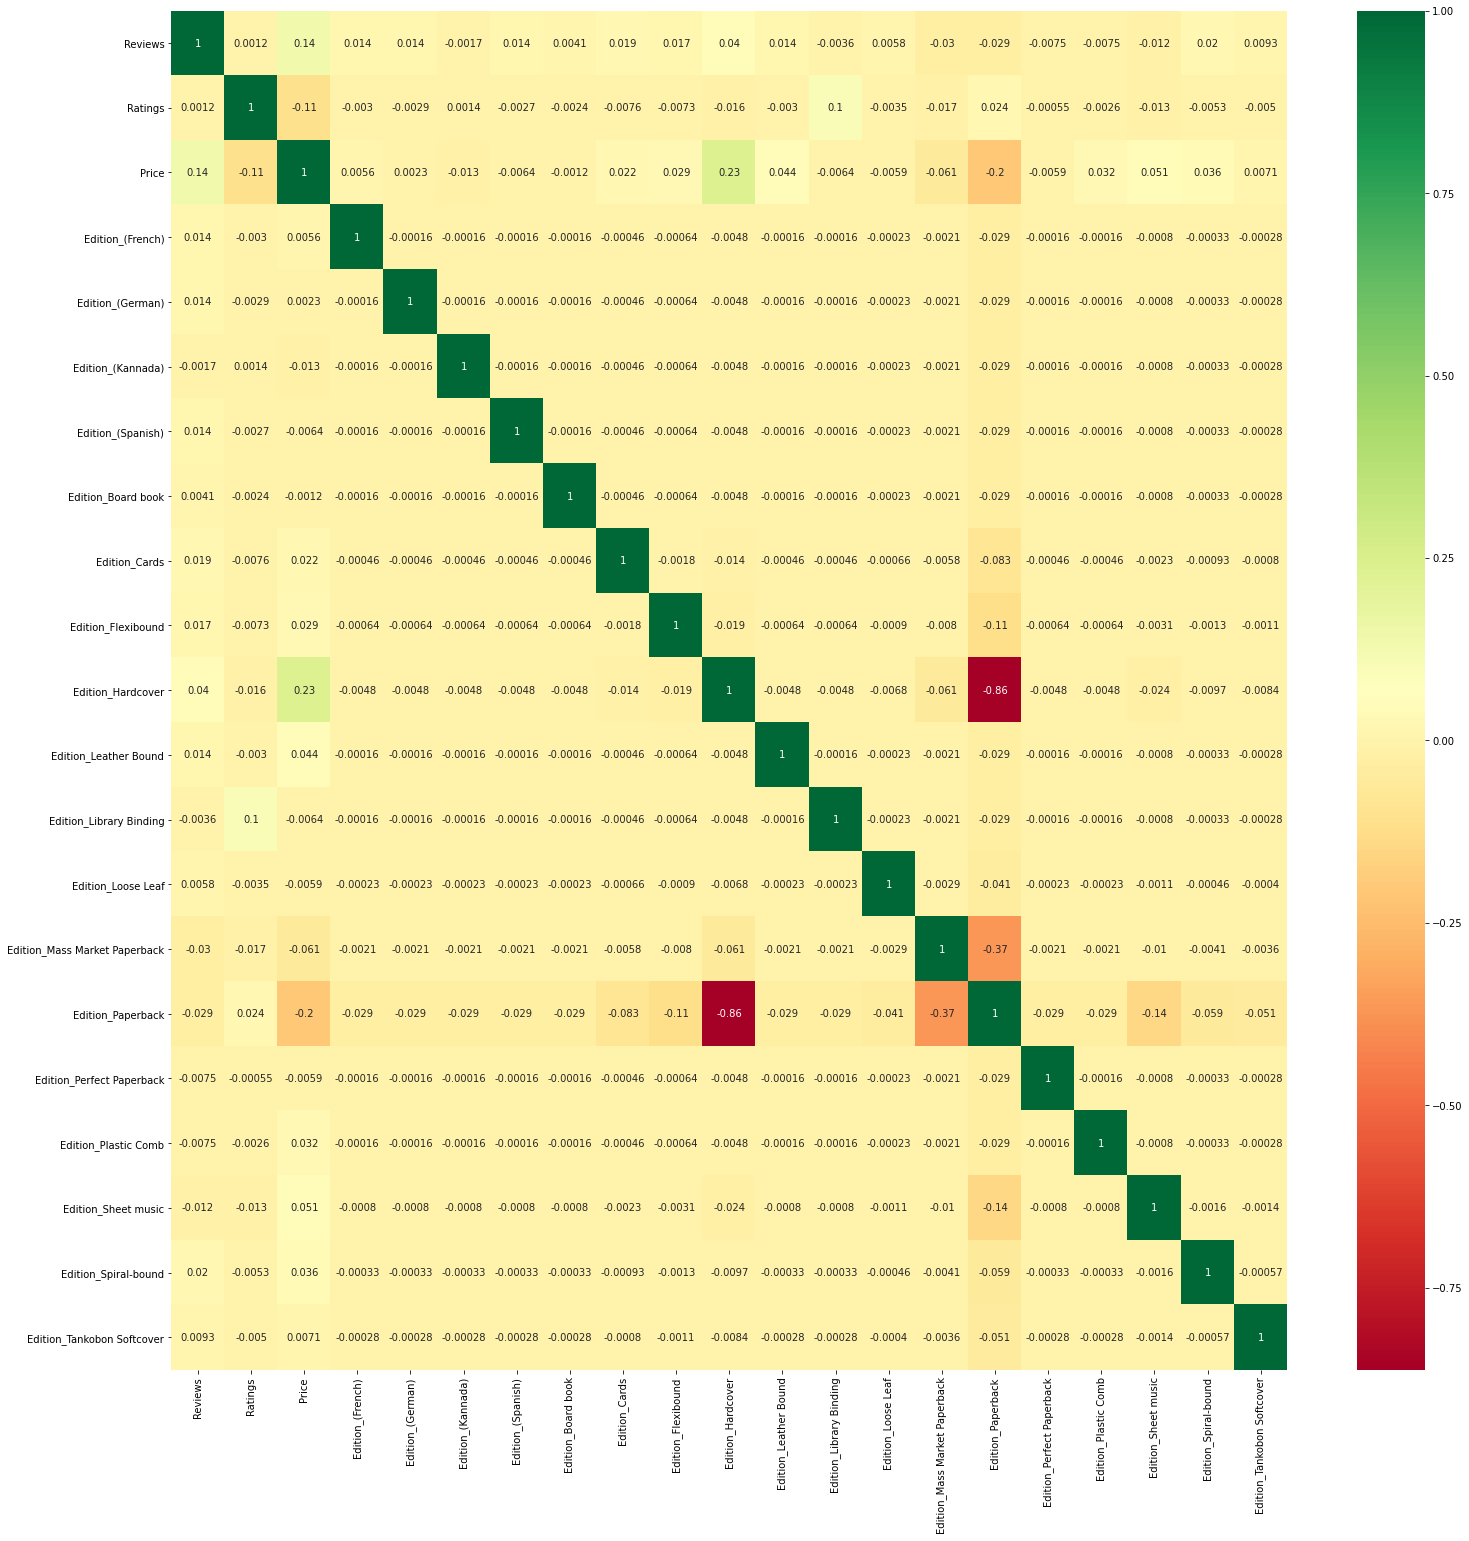

In [42]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn')

In [43]:
train.head()

,Reviews,Ratings,Price,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,202.93,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [44]:
y = train.pop('Price')
train.head()

,Reviews,Ratings,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [45]:
test.pop('Price')
test.head()

,Reviews,Ratings,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.4,960.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


##Prediction Methods##

Split train and test data


In [46]:
X = train.to_numpy()

Import packages

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Decision Tree Regressor


In [ ]:
parameters = {'splitter': ['best','random'],
              'min_samples_leaf': [1,2],
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_DT = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_DT.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_DT.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_DT.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DT.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = DecisionTreeRegressor(**grid_DT.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df_dt = pd.DataFrame(predictions.astype(int))
df_dt.columns=['Price']
filepath_dt = 'Predictions_DecisionTrees.xlsx'
df_dt.to_excel(filepath_dt, index=False)
df_dt.head()

Gradient Boosting Regressor





In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000,1500],
              'max_depth'    : [4,6,8,10]
              }
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_GBR.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(**grid_GBR.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df2 = pd.DataFrame(predictions.astype(int))
df2.columns=['Price']
df2['Price']= df2['Price']
filepath2 = 'PredictionsGradientBoosting.xlsx'
df2.to_excel(filepath2, index=False)
df2.head()

Random Forest regressor







In [ ]:
parameters = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_RF = GridSearchCV(estimator=RandomForestRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_RF.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = RandomForestRegressor(**grid_RF.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df3 = pd.DataFrame(predictions.astype(int))
df3.columns=['Price']
filepath3 = 'Predictions_RandomForest.xlsx'
df3.to_excel(filepath3, index=False)
df3.head()

KNeighbors Regressor



In [ ]:
parameters = {
    'n_neighbors': [4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_KNN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_KNN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_KNN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = KNeighborsRegressor(**grid_KNN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df4 = pd.DataFrame(predictions.astype(int))
df4.columns=['Price']
filepath4 = 'Predictions_KNeighbors.xlsx'
df4.to_excel(filepath4, index=False)
df4.head()

Elastic Net




In [ ]:
parameters = {
    'alpha': [0,0.5,1],
    'l1_ratio': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_EN = GridSearchCV(estimator=ElasticNet(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_EN.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_EN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_EN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_EN.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = ElasticNet(**grid_EN.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df5 = pd.DataFrame(predictions.astype(int))
df5.columns=['Price']
filepath5 = 'Predictions_ElasticNet.xlsx'
df5.to_excel(filepath5, index=False)
df5.head()

Lasso



In [ ]:
parameters = {
    'alpha': [0,0.5,1],
    'l1_ratio': [0,0.5,1],
    'selection': ['cyclic', 'random']
}
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
grid_LASSO = GridSearchCV(estimator=Lasso(), param_grid = parameters, cv = 5, n_jobs=-1,verbose =10)
grid_LASSO.fit(rescaled_X_train, y)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_LASSO.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_LASSO.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_LASSO.best_params_)

In [ ]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = Lasso(**grid_LASSO.best_params_)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df6 = pd.DataFrame(predictions.astype(int))
df6.columns=['Price']
filepath6 = 'Predictions_Lasso.xlsx'
df6.to_excel(filepath6, index=False)
df6.head()